In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 2

In [3]:
def GetPA(t,lam,beta,gN,gy,gA0):
    P0  = 14

    A   = (1+(gA0*beta)/(gN*lam)*(np.exp(gN*lam*t)-1))**(1/beta)
    
    P   = P0*np.exp((gN+gy)*t)/A
    
    return P,A

In [4]:
print(GetP(0,0.2,1,0.01))

14.0


In [13]:
fig = plt.figure(figsize = (9, 15))
Plim = 709317
t = np.linspace(0,1000,100)
gN   = 0.02
gy   = 0.02
gA0  = 0.02


P0  = 14
gP  = gN+gy-gA0
P1  = P0*np.exp(gP*t)
A1  = np.exp(gA0*t)

P2  = P0*np.exp((gN+gy)*t)
A2  = np.ones(len(P2))

lam   = 1
beta  = 2
P3,A3 = GetPA(t,lam,beta,gN,gy,gA0)

lam   = 2
beta  = 1
P4,A4 = GetPA(t,lam,beta,gN,gy,gA0,)

plt.subplot(2,1,1)
plt.plot(t,P1,'b')
plt.plot(t,P2,'g')
plt.plot(t,P3,'r')
plt.plot(t,P4,'m')
plt.axhline(y = Plim, color = 'k', linestyle = '-')
plt.yscale("log")
plt.xlabel("Time [years]",font)
plt.ylabel("Power [TW]",font)

plt.subplot(2,1,2)
plt.plot(t,A1,'b')
plt.plot(t,A2,'g')
plt.plot(t,A3,'r')
plt.plot(t,A4,'m')
plt.yscale("log")
plt.xlabel("Time [years]",font)
plt.ylabel("PFP",font)
plt.legend((r'g$_A$=0.02',r'g$_A$=0',r'$\lambda$=1, $\beta$=2',r'$\lambda$=2, $\beta$=1'))

NameError: name 'GetPA' is not defined

<Figure size 900x1500 with 0 Axes>

In [2]:
def GetAlpha(gA0,Ne0,A0,lam,beta):
        
    alpha = gA0 / ((Ne0**lam) * (A0**(-beta)))

    return alpha

In [3]:
def GetgP(t,alpha,lam,beta,gNe,gY,gX,thetaX,thetaP,thetaN,Ne0,A0):
        
    P0  = 14

    # A   = (1+(gA0*beta)/(gN*lam)*(np.exp(gN*lam*t)-1))**(1/beta) # What Dorian previously had
    A   = ( ((alpha*beta*(Ne0**lam))/(gNe*lam))*(np.exp(gNe*lam*t)-1) + (A0**beta))**(1/beta)

    Ne = Ne0*np.exp((gNe)*t) # 1xt vector

    gA = alpha * (Ne**lam) * (A**(-beta)) # 1xt vector

    gP = (1/thetaP) * (gY - (thetaX * gX) - (thetaN * gNe) - gA)

    P = P0*np.exp(((1/thetaP) * (gY - (thetaX * gX) - (thetaN * gNe)))*t)/((A/A0)**(1/thetaP)) 
    # This does not account for y0,X0,Ne0
    # P = np.divide(P0*np.exp((gP)*t),(A**thetaP)) # This does not account for y0,X0,Ne0
    # P = P0*np.exp((gP)*t)/((A/A0)**thetaP) # This does 
    
    return gA,gP,A,P

gA =  0.013  --> gP =  0.03785527638190989
gA =  0  --> gP =  0.6911216080402013
(lam, beta) = ( 1 , 1.045 ) --> alpha =  0.24352991912051394
(lam, beta) = ( 1 , 1.1 ) --> alpha =  0.3026443066896288
(lam, beta) = ( 1 , 0.9 ) --> alpha =  0.13731938183100711
(lam, beta) = ( 1 , 1 ) --> alpha =  0.20386007237635703
(lam, beta) = ( 1 , 2.5 ) --> alpha =  76.44290617316655


/var/folders/bj/4vflyls91mvbj2mnqj253n1h0000gq/T/ipykernel_26873/3369921180.py:14: RuntimeWarning: overflow encountered in power
  P = P0*np.exp(((1/thetaP) * (gY - (thetaX * gX) - (thetaN * gNe)))*t)/((A/A0)**(1/thetaP))


Text(0.5, 1.0, 'C: Level of power consumption')

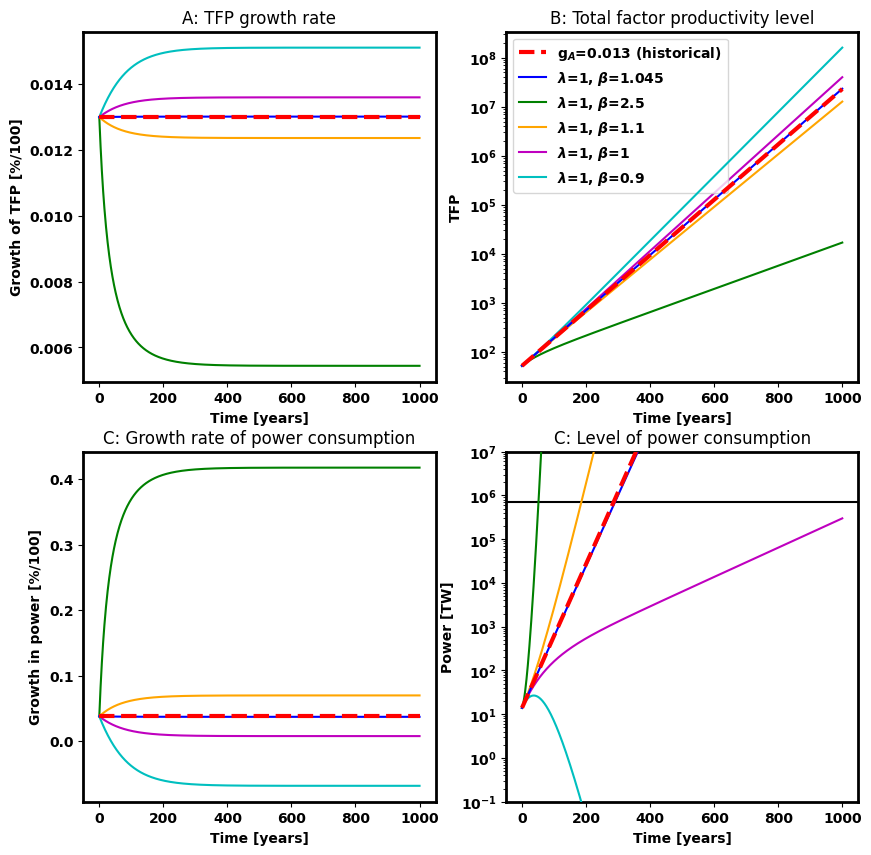

In [4]:
# Required parameters: 
# GetgP(t,alpha,lam,beta,gN,gy,gX,gA0)
# GetAlpha(gA0,N0,A0,lam,beta)
# Cursor version

fig = plt.figure(figsize = (10, 10))
Plim = 709317
t = np.linspace(0,1000,1000)

# print(len(t))

# Estimates from log CD regs
# thetaX = 0.7901
# thetaP = 0.0126
# thetaN = 0.1973

# Estimates from growth CD regs, where constant is gA = 0.0099 - r2 = 0.06
# thetaX = 0.4418
# thetaP = 0.0782
# thetaX = 0.53
# thetaP = 0.02
# thetaX = 0.46
# thetaP = 0.26
# thetaN = 1 - thetaX - thetaP

# Gmeans at annual level
# gN   = 0.012
# gy   = 0.0327
# gX = 0.0372
# gA0  = 0.021

# Simple means
# gY = 0.0419
# gX = 0.0448
# gP = 0.0335
# gNe = 0.0178
# gA0 = 0.0093

# Gmeans means
# gY = 0.0420
# gX = 0.0372
# gP = 0.0362
# gNe = 0.0166
# gA0 = 0.0093

# Means all countries, weighted by GDP, last 20 years
# gY = 0.0360 
# gX = 0.0421 
# gP = 0.0192 
# gNe = 0.0112 
# gA0 = 0.01

# Fig 1
# gP = 2.07/100
# gNe = 1.54/100
# gY = (1.73/100) + gNe
# gX = 0.0421 
# gA0 = 0.01

# gY = 0.0173 + 0.0154 
# # gY = 0.0353 
# gX = 0.0317 # this is a problem
# gP = 0.0236 
# gNe = 0.0154 
# gA0 = 0.0129 # this is a problem

# P0  = 14
# N0 = 7.581 # units are billions (10**9)
# Ne0 = 3.316 # units are billions (10**9)
# A0 = 2.7 # obtained from CD regs
# A0 = 57.9 # obtained from CD regs

# This combination works --> generates intersection in 400 yrs
# thetaX = 0.4418
# thetaP = 0.0782
# thetaN = 1 - thetaX - thetaP
# Means all countries, weighted by GDP, last 20 years
# gY = 0.0360 
# gX = 0.0421 
# gP = 0.0192 
# gNe = 0.0112 
# gA0 = 0.01
# Starting points
# P0  = 14
# N0 = 7.581 # units are billions (10**9)
# Ne0 = 3.316 # units are billions (10**9)
# A0 = 2.7 # obtained from CD regs

# Combo with USSR and replacement 
thetaX = 0.5381
thetaP = 0.0199
thetaN = 1 - thetaX - thetaP
# Means all countries, weighted by GDP, last 20 years
gY = 0.0471 
gX = 0.0508 
gP = 0.0402 
gNe = 0.0136 
gA0 = 0.0130
# Starting points
P0  = 14
N0 = 7.581 # units are billions (10**9)
Ne0 = 3.316 # units are billions (10**9)
A0 = 52 # obtained from CD regs


######################
# gA = gA0
######################

# gP  = gN+gy-gA0
gA = gA0 # scalar
gA1lab = gA # label for legend
gA1 = np.ones(len(t))* gA # Correct starting value
A1  = A0*np.exp(gA*t) # Correct starting value

# gP = (1/thetaP)*((gy + gN) - (thetaX * gX) - (thetaN * gN) - gA1)
# P = P0*np.exp(((1/thetaP)*((gy + gN) - (thetaX * gX) - (thetaN * gN)))*t)/((A1/A0)**thetaP)
gP = (1/thetaP)*((gY) - (thetaX * gX) - (thetaN * gNe) - gA) # scalar
gP1 = np.ones(len(t))*(gP) # vector
P1 = P0*np.exp(((1/thetaP)*((gY) - (thetaX * gX) - (thetaN * gNe)))*t)/((A1/A0)**(1/thetaP)) # vector
# P1 = P0*np.exp(((1/thetaP)*((gY) - (thetaX * gX) - (thetaN * gNe) - (gA)))*t) # vector
print("gA = ",gA," --> gP = ",gP)
# P1   = P0*np.exp((gP)*t)

# lam   = 1
# beta  = 2
# alph = 0 # get A to be A and constant over time
# gA1,gP1,A1,P1 = GetgP(t,alph,lam,beta,gN,gy,gX,gA0,thetaX,thetaP,thetaN,Ne0,A0)

######################
# gA = 0
######################

gA = 0
gA2lab = gA # label for legend
gA2 = np.ones(len(t))*gA # INCORRECT starting value
A2  = A0*np.exp(gA*t) # Correct starting value

gP = (1/thetaP)*((gY) - (thetaX * gX) - (thetaN * gNe) - gA) # scalar
gP2 = np.ones(len(t))*(gP) # vector
P2 = P0*np.exp(((1/thetaP)*((gY) - (thetaX * gX) - (thetaN * gNe)))*t)/((A2/A0)**(1/thetaP)) # vector
# P2 = P0*np.exp(((1/thetaP)*((gY) - (thetaX * gX) - (thetaN * gNe) - (gA)))*t) # vector
print("gA = ",gA," --> gP = ",gP)

######################
lam   = 1
beta  = 1.045
######################

lam3lab = lam
beta3lab = beta
alph = GetAlpha(gA0,Ne0,A0,lam,beta) 
print("(lam, beta) = (",lam,",",beta,") --> alpha = ",alph)
gA3,gP3,A3,P3 = GetgP(t,alph,lam,beta,gNe,gY,gX,thetaX,thetaP,thetaN,Ne0,A0)

######################
lam   = 1
beta = 1.1
# beta  = 0.8
######################

lam4Alab = lam
beta4Alab = beta
alph = GetAlpha(gA0,Ne0,A0,lam,beta) 
print("(lam, beta) = (",lam,",",beta,") --> alpha = ",alph)
gA4A,gP4A,A4A,P4A = GetgP(t,alph,lam,beta,gNe,gY,gX,thetaX,thetaP,thetaN,Ne0,A0)

######################
lam   = 1
beta = 0.9
# beta  = 1.1
######################

lam4Blab = lam
beta4Blab = beta
alph = GetAlpha(gA0,Ne0,A0,lam,beta) 
print("(lam, beta) = (",lam,",",beta,") --> alpha = ",alph)
gA4B,gP4B,A4B,P4B = GetgP(t,alph,lam,beta,gNe,gY,gX,thetaX,thetaP,thetaN,Ne0,A0)

# print(A1[0],A2[0],A3[0],A4[0])

######################
lam   = 1
beta  = 1
######################

lam5lab = lam
beta5lab = beta
alph = GetAlpha(gA0,Ne0,A0,lam,beta) 
print("(lam, beta) = (",lam,",",beta,") --> alpha = ",alph)
gA5,gP5,A5,P5 = GetgP(t,alph,lam,beta,gNe,gY,gX,thetaX,thetaP,thetaN,Ne0,A0)

######################
lam   = 1
beta  = 2.5
######################

lam6lab = lam
beta6lab = beta
alph = GetAlpha(gA0,Ne0,A0,lam,beta) 
print("(lam, beta) = (",lam,",",beta,") --> alpha = ",alph)
gA6,gP6,A6,P6 = GetgP(t,alph,lam,beta,gNe,gY,gX,thetaX,thetaP,thetaN,Ne0,A0)

plt.subplot(2,2,1)
plt.plot(t,gA1,'r--',linewidth=3,zorder=25)
#plt.plot(t,gA2,'g',zorder=20)
plt.plot(t,gA6,'g',zorder=10)
plt.plot(t,gA4A,'orange',zorder=10)
plt.plot(t,gA4B,'c',zorder=10)
plt.plot(t,gA5,'m',zorder=5)
plt.plot(t,gA3,'b',zorder=15)
# plt.yscale("log")
plt.xlabel("Time [years]",font)
plt.ylabel("Growth of TFP [%/100]",font)
plt.title('A: TFP growth rate')

plt.subplot(2,2,2)
plt.plot(t,A1,'r--',linewidth=3,zorder=25)
plt.plot(t,A3,'b',zorder=15)
plt.plot(t,A6,'g',zorder=10)
plt.plot(t,A4A,'orange',zorder=10)
plt.plot(t,A5,'m',zorder=5)
plt.plot(t,A4B,'c',zorder=10)
# plt.plot(t,A6,'#389f0a',zorder=10)
# plt.plot(t,A4A,color='#389f0a',linestyle='dashed',zorder=10)
# plt.plot(t,A5,color='#5ae717',linestyle='dashed',zorder=5)
# plt.plot(t,A4B,'#5ae717',zorder=10)
plt.yscale("log")
plt.xlabel("Time [years]",font)
plt.ylabel("TFP",font)
plt.legend((rf'g$_A$={gA1lab} (historical)',rf'$\lambda$={lam3lab}, $\beta$={beta3lab}',rf'$\lambda$={lam6lab}, $\beta$={beta6lab}',rf'$\lambda$={lam4Alab}, $\beta$={beta4Alab}',rf'$\lambda$={lam5lab}, $\beta$={beta5lab}',rf'$\lambda$={lam4Blab}, $\beta$={beta4Blab}'))
plt.title('B: Total factor productivity level')

plt.subplot(2,2,3)
plt.plot(t,gP1,'r--',linewidth=3,zorder=25)
# plt.plot(t,gP2,'g',zorder=20)
plt.plot(t,gP3,'b',zorder=15)
plt.plot(t,gP6,'g',zorder=10)
plt.plot(t,gP4A,'orange',zorder=10)
plt.plot(t,gP4B,'c',zorder=10)
plt.plot(t,gP5,'m',zorder=5)
# plt.yscale("log")
plt.xlabel("Time [years]",font)
plt.ylabel("Growth in power [%/100]",font)
plt.title('C: Growth rate of power consumption')

plt.subplot(2,2,4)
plt.plot(t,P1,'r--',linewidth=3,zorder=25)
# plt.plot(t,P2,'g',zorder=20)
plt.plot(t,P3,'b',zorder=15)
plt.plot(t,P6,'g',zorder=10)
plt.plot(t,P4A,'orange',zorder=10)
plt.plot(t,P4B,'c',zorder=10)
plt.plot(t,P5,'m',zorder=5)
plt.axhline(y = Plim, color = 'k', linestyle = '-')
plt.yscale("log")
plt.ylim(1e-1,1e7)
plt.xlabel("Time [years]",font)
plt.ylabel("Power [TW]",font)
plt.title('C: Level of power consumption')


